In [3]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import requests as req # For bring in Gutenberg text
import os # For identifying and changong the current working directory: os.get_cwd(), os.ch_dir() 

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [4]:
os.getcwd()
os.chdir("C:\\Users\\Alex\\machine-learning\\word2vec_gensim")
os.getcwd()

'C:\\Users\\Alex\\machine-learning\\word2vec_gensim'

'C:\\Users\\Alex\\machine-learning\\word2vec_gensim'

We create a list (austen_texts) of all the url containing text verions of Austen most important works.

In [5]:
# urls of text at GB for Austens works
url1 = 'https://www.gutenberg.org/files/21839/21839-0.txt' # Sense and Sensibility
url2 = 'https://www.gutenberg.org/cache/epub/42671/pg42671.txt' # Pride and Prejudice
url3 = 'https://www.gutenberg.org/files/141/141-0.txt' # Mansfield Park
url4 = 'https://www.gutenberg.org/files/158/158-0.txt' # Emma
url5 = 'https://www.gutenberg.org/files/121/121-0.txt' # Northanger Abbey
url6 = 'https://www.gutenberg.org/cache/epub/946/pg946.txt' # Lady Susan
url7 = 'https://www.gutenberg.org/cache/epub/105/pg105.txt'   # Persuasion
austen_texts = [url1, url2, url3, url4, url5, url6, url7]

In [6]:
def txt_to_df(url):
	"""retrieves the text at url and stores the sentences in a dataframe
	
	Dependencies:
	pandas, requests

	Arg:
	A url in string form linked to text (code test on urls from Project Gutenberg)

	Returns:
	A panda dataframe containing all the sentences in the text.

	"""
	# Get the information form the URL and turn it into text.
	res = req.get(url) # 
	text = str(res.text[1:]) # Skip first character of text file

	# Create a regular expression to find all the sentences in a string of text.
	pat = re.compile(r'([A-Z][^\.!?;]*[\.!?;])', re.M)
	sentences = pat.findall(text)

	df = pd.concat([pd.DataFrame([item], columns=['sentences']) for item in sentences], ignore_index=True)
	return df

df_list = []
for item in austen_texts:
    df = txt_to_df(item)
    print(f'{item}: df.shape = {df.shape}')
    df_list.append(df)
    
df = pd.concat(df_list)
print(f'*****{df.shape}*****')
print(df[:200])

https://www.gutenberg.org/files/21839/21839-0.txt: df.shape = (6906, 1)
https://www.gutenberg.org/files/21839/21839-0.txt: df.shape = (6906, 1)
https://www.gutenberg.org/cache/epub/42671/pg42671.txt: df.shape = (8082, 1)
https://www.gutenberg.org/cache/epub/42671/pg42671.txt: df.shape = (8082, 1)
https://www.gutenberg.org/files/141/141-0.txt: df.shape = (9037, 1)
https://www.gutenberg.org/files/141/141-0.txt: df.shape = (9037, 1)
https://www.gutenberg.org/files/158/158-0.txt: df.shape = (11597, 1)
https://www.gutenberg.org/files/158/158-0.txt: df.shape = (11597, 1)
https://www.gutenberg.org/files/121/121-0.txt: df.shape = (4664, 1)
https://www.gutenberg.org/files/121/121-0.txt: df.shape = (4664, 1)
https://www.gutenberg.org/cache/epub/946/pg946.txt: df.shape = (1444, 1)
https://www.gutenberg.org/cache/epub/946/pg946.txt: df.shape = (1444, 1)
https://www.gutenberg.org/cache/epub/105/pg105.txt: df.shape = (4462, 1)
*****(46192, 1)*****
                                             sentenc

In [7]:
df[:50]

,sentences
0,The Project Gutenberg eBook of Sense and Sensi...
1,"You may copy it, give it away or re-use it und..."
2,"If you are not located in the United States, y..."
3,Title: Sense and Sensibility\r\n\r\nAuthor: Ja...
4,The illustration\r\non page 290 is missing fro...
5,The Introduction ends abruptly.
6,Seems incomplete.
7,Illustration: _Mr.
8,Dashwood introduced him.
9,P.


,sentences
0,The Project Gutenberg eBook of Sense and Sensi...
1,"You may copy it, give it away or re-use it und..."
2,"If you are not located in the United States, y..."
3,Title: Sense and Sensibility\r\n\r\nAuthor: Ja...
4,The illustration\r\non page 290 is missing fro...
5,The Introduction ends abruptly.
6,Seems incomplete.
7,Illustration: _Mr.
8,Dashwood introduced him.
9,P.


In [8]:
df.isnull().sum()

sentences    0
dtype: int64

sentences    0
dtype: int64

In [9]:
print(f'df[:30] = {df[:30]}')
df = df.dropna().reset_index(drop=True)
df.isnull().sum()
print(f'df[:30] = {df[:30]}')

df[:30] =                                             sentences
0   The Project Gutenberg eBook of Sense and Sensi...
1   You may copy it, give it away or re-use it und...
2   If you are not located in the United States, y...
3   Title: Sense and Sensibility\r\n\r\nAuthor: Ja...
4   The illustration\r\non page 290 is missing fro...
5                     The Introduction ends abruptly.
6                                   Seems incomplete.
7                                  Illustration: _Mr.
8                            Dashwood introduced him.
9                                                  P.
10  SENSE & SENSIBILITY\r\n\r\n\r\n\r\n           ...
11  LIMITED\r\n\r\n                   NEW YORK: TH...
12  In the _Cecilia_\r\nof Madame D'Arblay--the fo...
13  The whole of this unfortunate business'--says ...
14  Lyster, talking in capitals, towards the end o...
15  But here comes in the little problem to which ...
16  Pride and Prejudice_ it is true, was written a...
17  Then, in 1797,

In [10]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

# Fixed problem with 'en'.   Anaconda Powershell has an admin option upon right click
# Helpful SO answer: 
# https://stackoverflow.com/questions/54334304
# /spacy-cant-find-model-en-core-web-sm-on-windows-10-and-python-3-5-3-anacon
# python -m spacy download en 

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [11]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['sentences'])

In [12]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.53 mins
Time to clean up everything: 0.53 mins


In [13]:
df_clean = pd.DataFrame({'clean': txt})
print(df_clean[:30])
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape
df_clean[:30]

                                                clean
0   project gutenberg ebook sense sensibility jane...
1   copy away use term project gutenberg license i...
2   locate united state check law country locate e...
3   title sense sensibility author jane austen com...
4                         illustration page miss book
5                           introduction end abruptly
6                                                None
7                                                None
8                                                None
9                                                None
10  sense sensibility jane austen introduction aus...
11  limited new york macmillan company edition hug...
12  cecilia madame d'arblay forerunner model miss ...
13     unfortunate business ' say certain didactic dr
14  lyster talk capital end volume cecilia ' resul...
15                          come little problem refer
16  pride prejudice true write finish sense sensib...
17  author fall work old ess

,clean
0,project gutenberg ebook sense sensibility jane...
1,copy away use term project gutenberg license i...
2,locate united state check law country locate e...
3,title sense sensibility author jane austen com...
4,illustration page miss book
5,introduction end abruptly
10,sense sensibility jane austen introduction aus...
11,limited new york macmillan company edition hug...
12,cecilia madame d'arblay forerunner model miss ...
13,unfortunate business ' say certain didactic dr


,clean
0,project gutenberg ebook sense sensibility jane...
1,copy away use term project gutenberg license i...
2,locate united state check law country locate e...
3,title sense sensibility author jane austen com...
4,illustration page miss book
5,introduction end abruptly
10,sense sensibility jane austen introduction aus...
11,limited new york macmillan company edition hug...
12,cecilia madame d'arblay forerunner model miss ...
13,unfortunate business ' say certain didactic dr


In [14]:
#  Pick up at Bigrams: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial/notebook?scriptVersionId=6660075&cellId=23

from gensim.models.phrases import Phrases, Phraser

In [15]:
sent = [row.split() for row in df_clean['clean']]

In [16]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 15:08:13: collecting all words and their counts
INFO - 15:08:13: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 15:08:13: collecting all words and their counts
INFO - 15:08:13: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 15:08:13: PROGRESS: at sentence #10000, processed 73081 words and 56677 word types
INFO - 15:08:13: PROGRESS: at sentence #10000, processed 73081 words and 56677 word types
INFO - 15:08:13: PROGRESS: at sentence #20000, processed 144127 words and 102442 word types
INFO - 15:08:13: PROGRESS: at sentence #20000, processed 144127 words and 102442 word types
INFO - 15:08:13: PROGRESS: at sentence #30000, processed 214878 words and 144530 word types
INFO - 15:08:13: PROGRESS: at sentence #30000, processed 214878 words and 144530 word types
INFO - 15:08:13: collected 149903 token types (unigram + bigrams) from a corpus of 224957 words and 31395 sentences
INFO - 15:08:13: collected 149903 token types (unigram + bigrams) from

In [17]:
bigram = Phraser(phrases)

INFO - 15:08:25: exporting phrases from Phrases<149903 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 15:08:25: exporting phrases from Phrases<149903 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 15:08:25: FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<57 phrases, min_count=30, threshold=10.0> from Phrases<149903 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.28s', 'datetime': '2021-06-21T15:08:25.702897', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
INFO - 15:08:25: FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<57 phrases, min_count=30, threshold=10.0> from Phrases<149903 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.28s', 'datetime': '2021-06-21T15:08:25.702897', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64

In [18]:
sentences = bigram[sent]

In [19]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

9440

9440

In [20]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

["'s", 'think', 'say', 'know', 'good', 'mr', 'come', 'time', 's', 'little']

["'s", 'think', 'say', 'know', 'good', 'mr', 'come', 'time', 's', 'little']

In [21]:
import multiprocessing

from gensim.models import Word2Vec

In [22]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
print(cores)

8
8


In [23]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300, # key word has change from size to vector_size
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

INFO - 15:09:05: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.03)', 'datetime': '2021-06-21T15:09:05.708544', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
INFO - 15:09:05: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.03)', 'datetime': '2021-06-21T15:09:05.708544', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [24]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 15:09:14: collecting all words and their counts
INFO - 15:09:14: collecting all words and their counts
INFO - 15:09:14: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:09:14: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:09:14: PROGRESS: at sentence #10000, processed 71780 words, keeping 5807 word types
INFO - 15:09:14: PROGRESS: at sentence #10000, processed 71780 words, keeping 5807 word types
INFO - 15:09:14: PROGRESS: at sentence #20000, processed 141026 words, keeping 7839 word types
INFO - 15:09:14: PROGRESS: at sentence #20000, processed 141026 words, keeping 7839 word types
INFO - 15:09:14: PROGRESS: at sentence #30000, processed 210036 words, keeping 9287 word types
INFO - 15:09:14: PROGRESS: at sentence #30000, processed 210036 words, keeping 9287 word types
INFO - 15:09:14: collected 9440 word types from a corpus of 219635 raw words and 31395 sentences
INFO - 15:09:14: collected 9440 word types from a corpus of

Time to build vocab: 0.01 mins


INFO - 15:09:14: resetting layer weights
INFO - 15:09:14: Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2021-06-21T15:09:14.644405', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'build_vocab'}


Time to build vocab: 0.01 mins


In [25]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 15:09:31: Word2Vec lifecycle event {'msg': 'training model with 7 workers on 1757 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2', 'datetime': '2021-06-21T15:09:31.742837', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'train'}
INFO - 15:09:31: Word2Vec lifecycle event {'msg': 'training model with 7 workers on 1757 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2', 'datetime': '2021-06-21T15:09:31.742837', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'train'}
INFO - 15:09:32: worker thread finished; awaiting finish of 6 more threads
INFO - 15:09:32: worker thread finished; awaiting finish of 6 more threads
INFO - 15:09:32: worker thread finished; awaiting finish of 5 more threads
INFO - 15:09:32: worker thread fini

INFO - 15:09:34: worker thread finished; awaiting finish of 0 more threads
INFO - 15:09:34: EPOCH - 6 : training on 219635 raw words (71476 effective words) took 0.4s, 163271 effective words/s
INFO - 15:09:35: worker thread finished; awaiting finish of 6 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 6 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 5 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 5 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 4 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 3 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 4 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 3 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 2 more threads
INFO - 15:09:35: worker thread finished; awaiting finish of 2 more threads
INFO - 15:09:35: worker thread finished; awaiting finish 

INFO - 15:09:38: worker thread finished; awaiting finish of 4 more threads
INFO - 15:09:38: worker thread finished; awaiting finish of 3 more threads
INFO - 15:09:38: worker thread finished; awaiting finish of 4 more threads
INFO - 15:09:38: worker thread finished; awaiting finish of 3 more threads
INFO - 15:09:38: worker thread finished; awaiting finish of 2 more threads
INFO - 15:09:38: worker thread finished; awaiting finish of 2 more threads
INFO - 15:09:38: worker thread finished; awaiting finish of 1 more threads
INFO - 15:09:38: worker thread finished; awaiting finish of 0 more threads
INFO - 15:09:38: EPOCH - 13 : training on 219635 raw words (71429 effective words) took 0.4s, 182056 effective words/s
INFO - 15:09:38: worker thread finished; awaiting finish of 1 more threads
INFO - 15:09:38: worker thread finished; awaiting finish of 0 more threads
INFO - 15:09:38: EPOCH - 13 : training on 219635 raw words (71429 effective words) took 0.4s, 182056 effective words/s
INFO - 15:09

INFO - 15:09:40: worker thread finished; awaiting finish of 0 more threads
INFO - 15:09:40: EPOCH - 19 : training on 219635 raw words (71556 effective words) took 0.5s, 143650 effective words/s
INFO - 15:09:40: worker thread finished; awaiting finish of 1 more threads
INFO - 15:09:40: worker thread finished; awaiting finish of 0 more threads
INFO - 15:09:40: EPOCH - 19 : training on 219635 raw words (71556 effective words) took 0.5s, 143650 effective words/s
INFO - 15:09:41: worker thread finished; awaiting finish of 6 more threads
INFO - 15:09:41: worker thread finished; awaiting finish of 6 more threads
INFO - 15:09:41: worker thread finished; awaiting finish of 5 more threads
INFO - 15:09:41: worker thread finished; awaiting finish of 5 more threads
INFO - 15:09:41: worker thread finished; awaiting finish of 4 more threads
INFO - 15:09:41: worker thread finished; awaiting finish of 4 more threads
INFO - 15:09:41: worker thread finished; awaiting finish of 3 more threads
INFO - 15:09

INFO - 15:09:44: worker thread finished; awaiting finish of 6 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 5 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 5 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 4 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 3 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 4 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 3 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 2 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 2 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 1 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 1 more threads
INFO - 15:09:44: worker thread finished; awaiting finish of 0 more threads
INFO - 15:09:44: EPOCH - 26 : training on 219635 raw words (71634 effective words) took 0.5s, 143939

Time to train the model: 0.25 mins
Time to train the model: 0.25 mins


In [26]:
w2v_model.wv.most_similar(positive=["emma"])

[('mrs_smith', 0.9874079823493958),
 ('miss_dashwood', 0.9811142683029175),
 ('miserable', 0.9780716896057129),
 ('wretched', 0.9759978652000427),
 ('elinor', 0.9755493402481079),
 ('history', 0.9741818308830261),
 ('repeatedly', 0.9740584492683411),
 ('frequently', 0.9737412929534912),
 ('marianne', 0.9730063080787659),
 ('progress', 0.9725398421287537)]

[('mrs_smith', 0.9874079823493958),
 ('miss_dashwood', 0.9811142683029175),
 ('miserable', 0.9780716896057129),
 ('wretched', 0.9759978652000427),
 ('elinor', 0.9755493402481079),
 ('history', 0.9741818308830261),
 ('repeatedly', 0.9740584492683411),
 ('frequently', 0.9737412929534912),
 ('marianne', 0.9730063080787659),
 ('progress', 0.9725398421287537)]

In [27]:
w2v_model.wv.most_similar(positive=["anne"])

[('lady_russell', 0.9866134524345398),
 ('mrs_clay', 0.9853870868682861),
 ('repeatedly', 0.9813629388809204),
 ('captain_harville', 0.9801150560379028),
 ('frank_churchill', 0.9797987341880798),
 ('tone', 0.9796059727668762),
 ('enquiry', 0.978878915309906),
 ('acquaint', 0.978841245174408),
 ('gravely', 0.9785845279693604),
 ('captain_benwick', 0.9780182838439941)]

[('lady_russell', 0.9866134524345398),
 ('mrs_clay', 0.9853870868682861),
 ('repeatedly', 0.9813629388809204),
 ('captain_harville', 0.9801150560379028),
 ('frank_churchill', 0.9797987341880798),
 ('tone', 0.9796059727668762),
 ('enquiry', 0.978878915309906),
 ('acquaint', 0.978841245174408),
 ('gravely', 0.9785845279693604),
 ('captain_benwick', 0.9780182838439941)]

In [ ]:
w2v_model.wv.most_similar(positive=["bennet"])

In [ ]:
w2v_model.wv.most_similar(positive=["elizabeth"])

In [ ]:
w2v_model.wv.most_similar(positive=["jane"])

In [ ]:
w2v_model.wv.most_similar(positive=["love"])

In [ ]:
w2v_model.wv.most_similar(positive=["woman"])

In [ ]:
w2v_model.wv.most_similar(positive=["man"])

In [ ]:
w2v_model.wv.most_similar(positive=["willie"])

In [ ]:
w2v_model.wv.most_similar(positive=["catherine"])

In [ ]:
w2v_model.wv.most_similar(positive=["money"])

In [ ]:
w2v_model.wv.most_similar(positive=["novel"])

In [ ]:
w2v_model.wv.most_similar(positive=["pianoforte"])

In [ ]:
character_list = ['emma', 'elinor', 'anne', 'elizabeth']
for char1 in character_list:
    for char2 in character_list:
        if char1 != char2:
            print(f'w2v_model.wv.similarity({char1}, {char2}) = {w2v_model.wv.similarity(char1, char2)}')

In [ ]:
w2v_model.wv.similarity('elizabeth', 'jane')

In [ ]:
w2v_model.wv.similarity('darcy', 'knightley')

In [ ]:
w2v_model.wv.similarity('darcy', 'churchill')

In [ ]:
for char in character_list:
    print(char, w2v_model.wv.similarity(char, 'sister'))

In [ ]:
for char in character_list:
    print(char, w2v_model.wv.similarity(char, 'love'))

In [ ]:
w2v_model.wv.similarity('darcy', 'elizabeth')

In [ ]:
w2v_model.wv.doesnt_match(['elinor', '', 'homer'])

In [ ]:
w2v_model.wv.doesnt_match(['marge', 'bart', 'homer'])

In [ ]:
w2v_model.wv.doesnt_match(['elton', 'churchill', 'knightley'])

In [ ]:
w2v_model.wv.doesnt_match(['money', 'love', 'happiness'])

In [ ]:
w2v_model.wv.doesnt_match(['marriage', 'money', 'happiness'])

In [ ]:
# Analogies
w2v_model.wv.most_similar(positive=["emma", "frank_churchill"], negative=["elizabeth"], topn=100)

In [ ]:
w2v_model.wv.most_similar(positive=["elinor", "edward"], negative=["love"], topn=50)

In [29]:
# Start with t-SNE visualizations
# https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial/notebook?scriptVersionId=6660075&cellId=75
# Here we will explore PCA.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [30]:
# Code inspired by:
# https://aneesha.medium.com/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """

    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

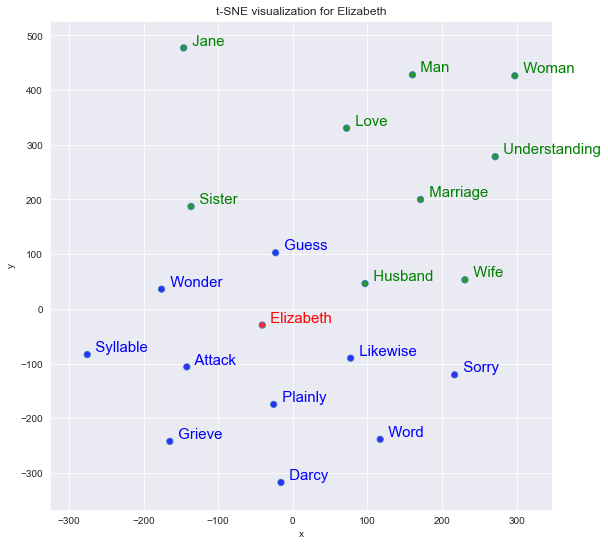

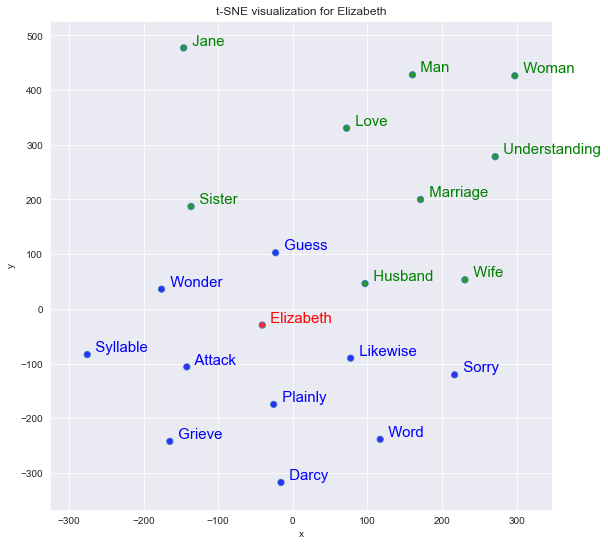

In [33]:
tsnescatterplot(w2v_model, 'elizabeth', ['jane','sister','understanding', 'marriage','man', 'woman', 'love', 'husband', 'wife'])
